# LIBRERIAS Y DEPENDENCIAS

In [25]:
import pandas as pd # --> Libreria para el manejo de dataframes a partir de los documentos cargados
from scipy import stats # --> calculos estadisticos para decteccion de outliers
import numpy as np # --> Para operaciones numericas y manipulacion de matrices
import warnings # --> Filtro de advertencias para ignorarlas y mantener el código limpio de mensajes no deseados
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt # --> para creacrion de grafico de valores nulos
import seaborn as sns # --> creacion de mapas de calor


______________________________________________________________________________________________________________________________________________________

# 2. EDA - los duplicados, faltantes, nulos y tipos de datos ya fueron tratados en el notebook 1.ETL

## >> Se procede con la carga de estos datos ya limpios desde la carpeta clean_data

______________________________________________________________________________________________________________________________________________________

# 2A. OUTLIERS

## >> Separacion de outliers en datasets (METODO Z-SCORES)

In [26]:
DF_Acc_tec_loc = pd.read_excel('../Datasets/Clean_data/cleaned_acc_tec_loc.xlsx')

In [27]:
# Calcular Z-scores
z_scores = np.abs(stats.zscore(DF_Acc_tec_loc.select_dtypes(include=[np.number])))

# Umbral común para considerar un valor como outlier (por ejemplo, Z > 3)
threshold = 3
outliers = (z_scores > threshold).sum(axis=0)

# mascara para las filas que no tienen outliers (todas las columnas deben estar por debajo del umbral)
non_outliers_mask = (z_scores < threshold).all(axis=1)

# Filtrar el DataFrame original utilizando la máscara
DF_Acc_tec_loc = DF_Acc_tec_loc[non_outliers_mask]

# Mostrar el número de outliers por columna
print("Número de outliers por columna:")
print(outliers)

Número de outliers por columna:
ADSL             17
CABLEMODEM       10
DIAL UP          18
FIBRA OPTICA     20
OTROS             9
SATELITAL         4
WIMAX            10
WIRELESS         31
Total general    13
dtype: int64


In [28]:
# Datos estadisticos con describe
DF_Acc_tec_loc.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000
mean,145.254679,926.842580,1.415775,693.488971,32.358957,0.570187,0.009358,131.834893,1931.775401
std,438.296634,3772.550244,8.415346,2328.610048,171.919984,1.447540,0.346805,284.085662,5884.075758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,155.000000
75%,46.250000,1.000000,0.000000,131.250000,0.000000,1.000000,0.000000,118.000000,859.000000
max,4911.000000,60922.000000,114.000000,26686.000000,3048.000000,28.000000,16.000000,2348.000000,73535.000000


CARGA DE DATASETS EN BLOQUE PARA APLICAR EL METODO Z-SCORES

In [29]:
DF_cover_popu= pd.read_excel('../Datasets/Clean_data/cl_cover_popu.xlsx')
DF_cover_homes= pd.read_excel('../Datasets/Clean_data/cl_cover_homes.xlsx')
DF_total_cover= pd.read_excel('../Datasets/Clean_data/cl_total_cover.xlsx')
DF_total_acc_tec = pd.read_excel('../Datasets/Clean_data/cl_total_acc_tec.xlsx')
DF_acc_tec = pd.read_excel('../Datasets/Clean_data/cl_acc_tec.xlsx')
DF_total_acc_vec = pd.read_excel('../Datasets/Clean_data/cl_total_acc_vec.xlsx')
DF_ingresos = pd.read_excel('../Datasets/Clean_data/cl_ingresos.xlsx')
DF_mapa_connect=pd.read_excel('../Datasets/Clean_data/cl_mapa.xlsx')
DF_ingresos_TV = pd.read_excel('../Datasets/Clean_data/cl_ingresos.xlsx')
DF_cover_TV = pd.read_excel('../Datasets/Clean_data/cl_cover_TV.xlsx')
DF_ingresos_tel_fija= pd.read_excel('../Datasets/Clean_data/cl_ingresos_tel_fija.xlsx')
DF_cover_tel_fija= pd.read_excel('../Datasets/Clean_data/cl_ingresos_tel_fija.xlsx')
DF_ingresos_movil = pd.read_excel('../Datasets/Clean_data/cl_ingresos_movil.xlsx')
DF_cover_movil = pd.read_excel('../Datasets/Clean_data/cl_cover_movil.xlsx')
DF_total_VMD= pd.read_excel('../Datasets/Clean_data/cl_totales_VMD.xlsx')

In [30]:
# LISTA DE datasets traidos del ETL
datasets= [DF_cover_popu, DF_cover_homes, DF_total_cover, DF_total_acc_tec, DF_acc_tec,DF_total_acc_vec,DF_ingresos,DF_mapa_connect,DF_ingresos,DF_mapa_connect,DF_ingresos_TV,DF_cover_TV,DF_ingresos_tel_fija,DF_cover_tel_fija,DF_ingresos_movil,DF_cover_movil,DF_total_VMD]

In [31]:
df_names = ['DF_cover_popu', 'DF_cover_homes', 'DF_total_cover', 'DF_total_acc_tec', 'DF_acc_tec',
            'DF_total_acc_vec', 'DF_ingresos', 'DF_mapa_connect', 'DF_ingresos_TV', 'DF_cover_TV',
            'DF_ingresos_tel_fija', 'DF_cover_tel_fija', 'DF_ingresos_movil', 'DF_cover_movil','DF_total_VMD']    

## Aqui se ve el size inicial del dataset CON OUTLIERS

In [32]:
# TAMANO INICIAL DATAFRAMME
for df, name in zip(datasets, df_names):
    print(f"{name}: {df.shape}")

DF_cover_popu: (984, 4)
DF_cover_homes: (984, 4)
DF_total_cover: (41, 6)
DF_total_acc_tec: (41, 10)
DF_acc_tec: (72, 9)
DF_total_acc_vec: (41, 11)
DF_ingresos: (41, 5)
DF_mapa_connect: (4305, 16)
DF_ingresos_TV: (41, 5)
DF_cover_TV: (4305, 16)
DF_ingresos_tel_fija: (41, 5)
DF_cover_tel_fija: (984, 5)
DF_ingresos_movil: (41, 3)
DF_cover_movil: (41, 3)
DF_total_VMD: (45, 5)


In [33]:
def remove_outliers(df, threshold=3):
    """
    Elimina outliers de un DataFrame basado en un umbral de Z-score.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame del que se eliminarán los outliers.
    threshold (float): El umbral de Z-score para considerar un valor como outlier (por defecto es 3).
    
    Retorna:
    pandas.DataFrame: Un nuevo DataFrame sin las filas que contienen outliers.
    """
    # Calcular los Z-scores para todas las columnas numéricas
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
    
    # Crear una máscara para las filas que no tienen outliers
    non_outliers_mask = (z_scores < threshold).all(axis=1)
    
    # Filtrar el DataFrame original utilizando la máscara
    df = df[non_outliers_mask]
    
    return df

In [34]:
# Se aplica la funcion sobre cada dataset conservando su mismo nombre, ahora SIN OUTLIERS
for i in range(len(datasets)):
    datasets[i] = remove_outliers(datasets[i])


## Aqui se ve el size del dataset SIN OUTLIERS

In [35]:
# TAMANO DEL DATASET DESPUES DE QUITAR OUTLIERS
for df, name in zip(datasets, df_names):
    print(f"{name}: {df.shape}")

DF_cover_popu: (945, 4)
DF_cover_homes: (984, 4)
DF_total_cover: (41, 6)
DF_total_acc_tec: (41, 10)
DF_acc_tec: (68, 9)
DF_total_acc_vec: (39, 11)
DF_ingresos: (40, 5)
DF_mapa_connect: (4219, 16)
DF_ingresos_TV: (40, 5)
DF_cover_TV: (4219, 16)
DF_ingresos_tel_fija: (40, 5)
DF_cover_tel_fija: (984, 5)
DF_ingresos_movil: (40, 3)
DF_cover_movil: (40, 3)
DF_total_VMD: (44, 5)


______________________________________________________________________________________________________________________________________________________

# 2B. EXPLORACION DE DATOS USANDO GRAFICOS

______________________________________________________________________________________________________________________________________________________

## TIPO DE TECNOLOGIAS, PROVINCIAS Y ACCESO

## >> Grafico de frecuencias para las tecnologias por provincia

Se omitio buenos aires y la suma total de tecnologias. Primero, porque Buenos Aires presentaba un mayor numero de datos que las otras provincias y no permitia apreciar la distribucion en las otras provincias. Segundo, una barra de total no aporta distincion entre las tecnologias

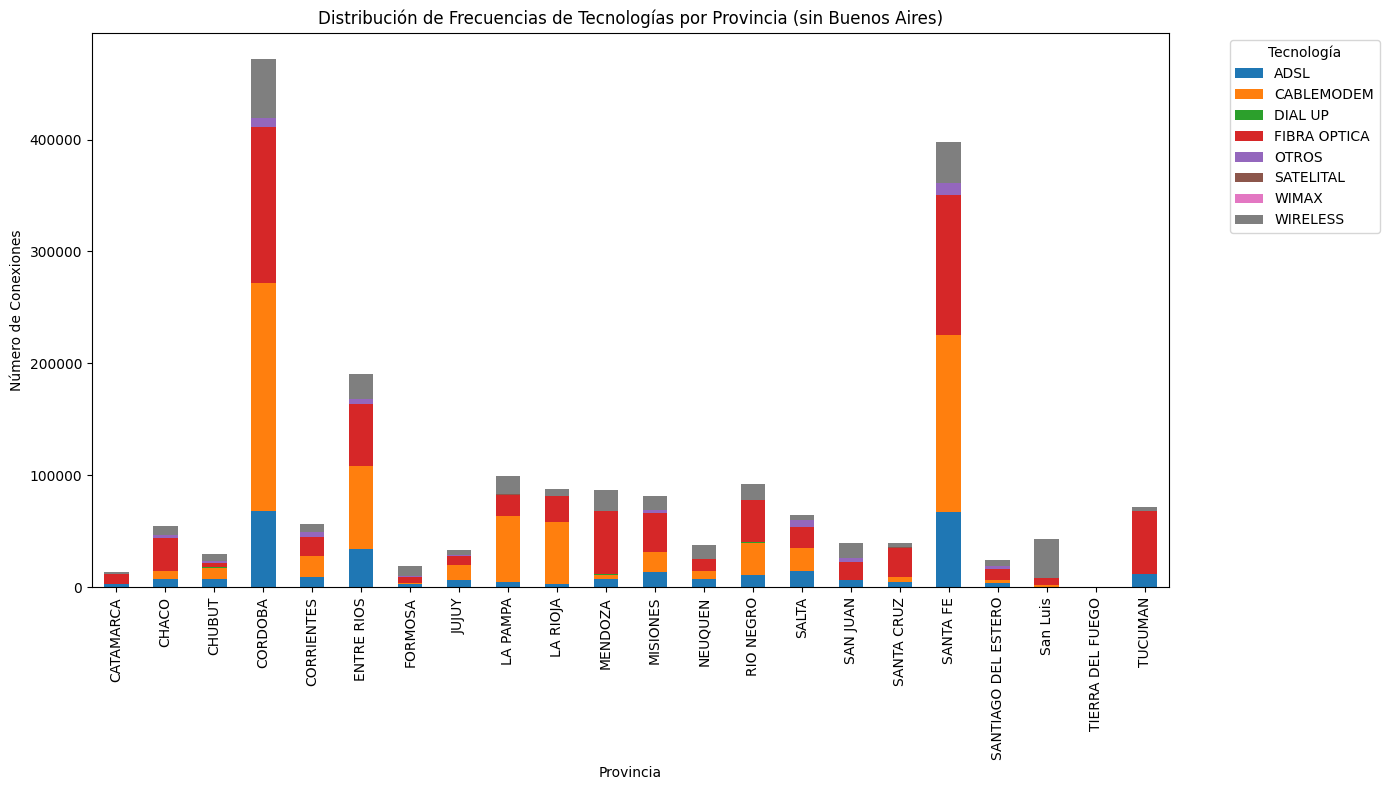

In [36]:
# Agrupar por Provincia y sumar las tecnologías para cada una
tech_by_province = DF_Acc_tec_loc.groupby('Provincia').sum()

# Eliminar la columna "Total general" y la fila "BUENOS AIRES"
if 'Total general' in tech_by_province.columns:
    tech_by_province = tech_by_province.drop(columns=['Total general'])

if 'BUENOS AIRES' in tech_by_province.index:
    tech_by_province = tech_by_province.drop(index='BUENOS AIRES')

# Crear un gráfico de barras apiladas para mostrar la distribución de frecuencias de tecnologías por provincia
tech_by_province.plot(kind='bar', stacked=True, figsize=(14, 8))

# Añadir título y etiquetas
plt.title('Distribución de Frecuencias de Tecnologías por Provincia (sin Buenos Aires)')
plt.xlabel('Provincia')
plt.ylabel('Número de Conexiones')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## INSIGHTS: 

- Podemos concluir que las tecnologias que mas predominan son : ADSL, Cablemodem, wireless y fibraoptica
- Las provincias con mayor acceso BS, Cordoba, Santa fe, Entre rios y La Pampa

## >> Grafico de barras: total de acceso (numero de conexiones) por provincia

Se puede ver que las provincias com mayor uso de tecnologias es bs, cordoba , santa fe y acba

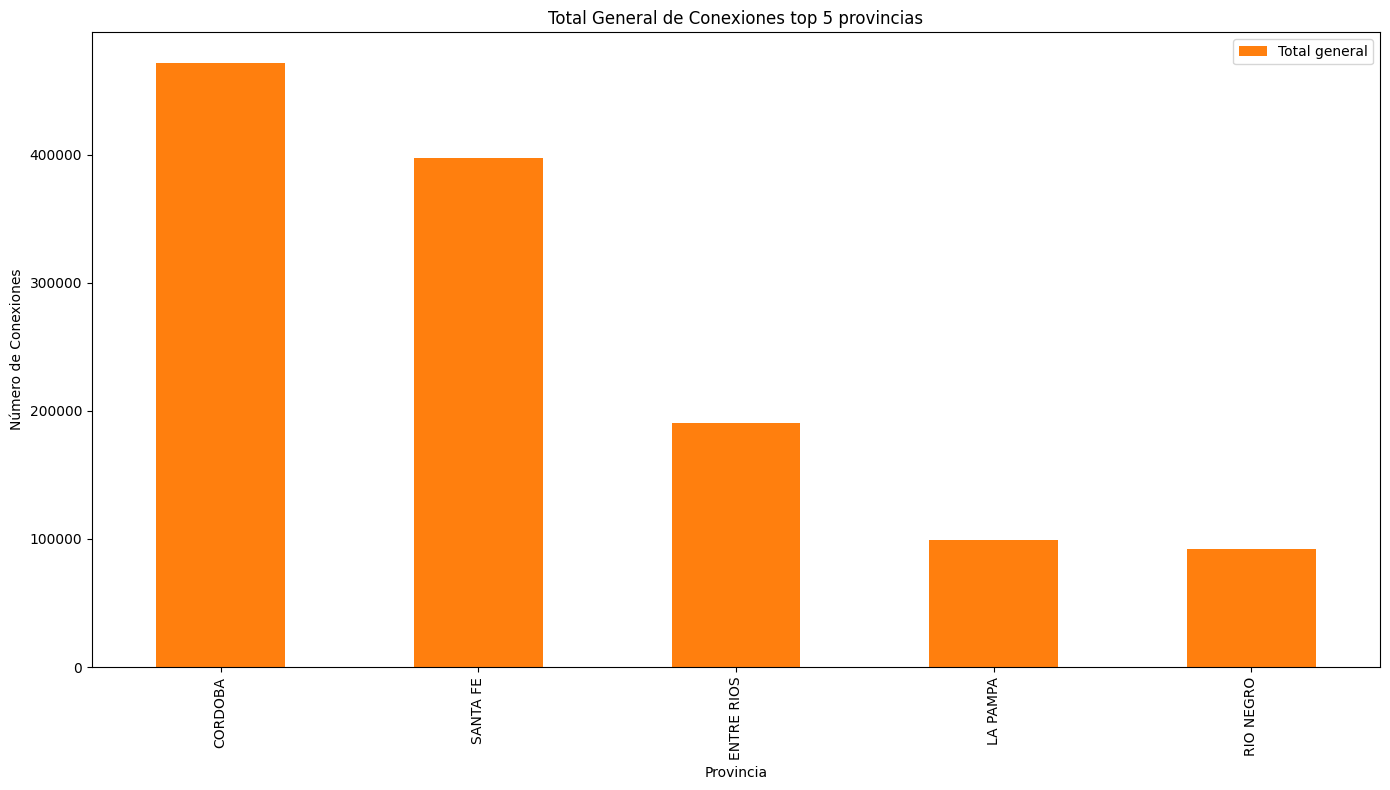

In [37]:
# Agrupar por Provincia y sumar las tecnologías para cada una
tech_by_province = DF_Acc_tec_loc.groupby('Provincia').sum()

# Filtrar solo las provincias de interés
provincias_interes = ['CORDOBA', 'SANTA FE', 'ENTRE RIOS', 'LA PAMPA', 'RIO NEGRO']
tech_by_province = tech_by_province.loc[provincias_interes]

# Filtrar solo la columna "Total general"
if 'Total general' in tech_by_province.columns:
    tech_by_province_total = tech_by_province[['Total general']]

# Crear un gráfico de barras para mostrar el total de conexiones por provincia seleccionada
tech_by_province_total.plot(kind='bar', figsize=(14, 8), color='#ff7f0e')

# Añadir título y etiquetas
plt.title('Total General de Conexiones top 5 provincias')
plt.xlabel('Provincia')
plt.ylabel('Número de Conexiones')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## INSIGHTS: 

- La provincia de BS es top 1 pero se excluyo para comparar las otras
- Las provincias con mayor acceso BS, Cordoba, Santa fe, Entre rios y La Pampa

## >> Grafico de torta: Acceso (numero de conexiones) por tecnologia

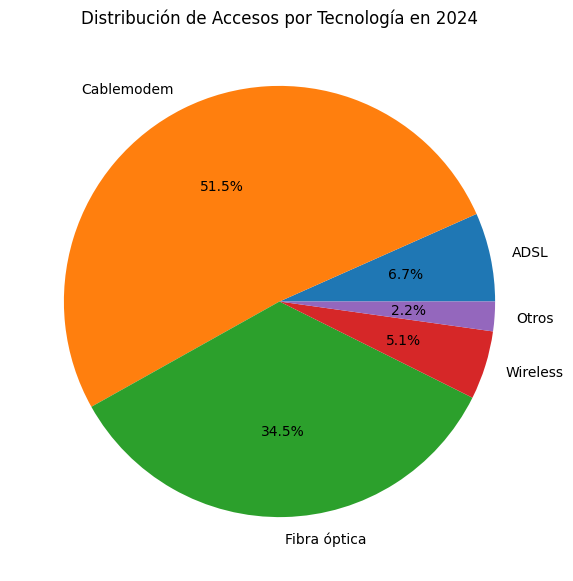

In [38]:
# Filtrar los datos para el año 2024
data_2024 = DF_total_acc_tec[DF_total_acc_tec['Año'] == 2024]

# Sumar los valores de las diferentes tecnologías para el año 2024
total_2024 = data_2024[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear un diagrama de pastel con una nueva paleta de colores
plt.figure(figsize=(10, 7))
total_2024.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Añadir título
plt.title('Distribución de Accesos por Tecnología en 2024')

# Mostrar el gráfico
plt.ylabel('')  # Para evitar que se muestre el nombre de la columna en la etiqueta
plt.show()

## INSIGHTS: 

- Cablemodem y fibra optica corresponden a las tecnologias mas usadas en 2024

______________________________________________________________________________________________________________________________________________________

## MATRIZ DE CORRELACION

MERGE DE LOS DATASETS total acceso tecnologia, total covertura, total velocidad de bajada y total ingresos

In [39]:
# MERGE DE DATASETS, todos usando la columna 'Periodo' como clave
merged_df = DF_total_cover.merge(DF_total_acc_tec, on='Periodo', how='inner') \
                          .merge(DF_total_VMD, on='Periodo', how='inner') \
                          .merge(DF_ingresos, on='Periodo', how='inner')

# TAMANO DE DATASET RESULTANTE
print(merged_df.shape)


(40, 22)


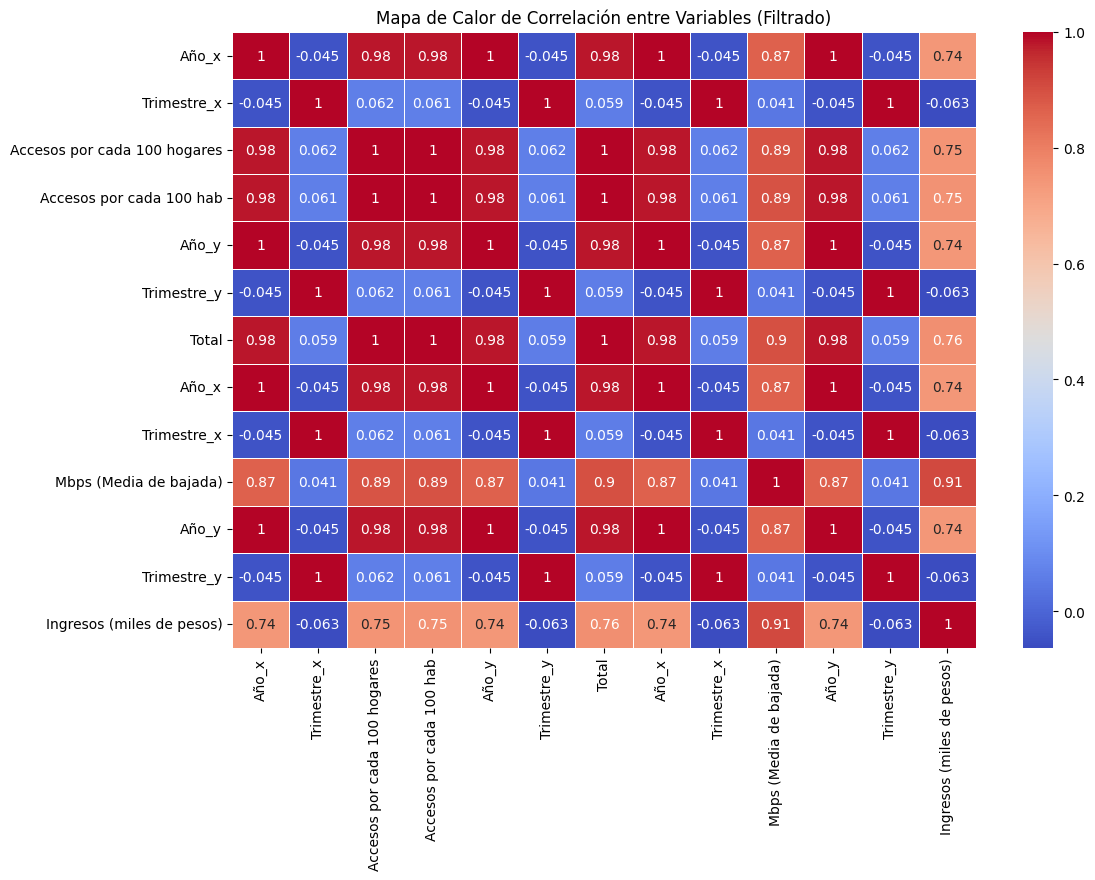

In [40]:
# Filtrar el DataFrame para eliminar las columnas que no queremos en el heatmap
filtered_df = merged_df.drop(columns=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'])

# Calcular matriz de correlación
filtered_correlation_matrix = filtered_df.corr()

# Crear mapa de calor (heatmap) para la matriz de correlación filtrada
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables (Filtrado)')
plt.show()

## INSIGHTS:
- A medida que aumenta el número total de tecnologías disponibles, también aumentan estos accesos, lo que es lógico, ya que más tecnología generalmente significa más disponibilidad de servicios
- Conforme a avanzan las tecnologias disponibles en el mercado, la velocidad promedio de descargas también tiende a aumentar
- Hay una correlacion alta tambien (0.76) entre ingresos y total tecnologias, puesto que hay mas servicios disponibles a elegir
- Si en el diagrama se incluye cada tecnologia. Se observa una relacion inversamente proporcional con respecto a ADSL debido a que se usa cada vez menos 

______________________________________________________________________________________________________________________________________________________________________________________________

# INGRESOS POR VELOCIDAD, TECNOLOGIA Y ACCESO A HOGARES

## >> Grafico de dispersion: Ingresos vs velocidad de descarga

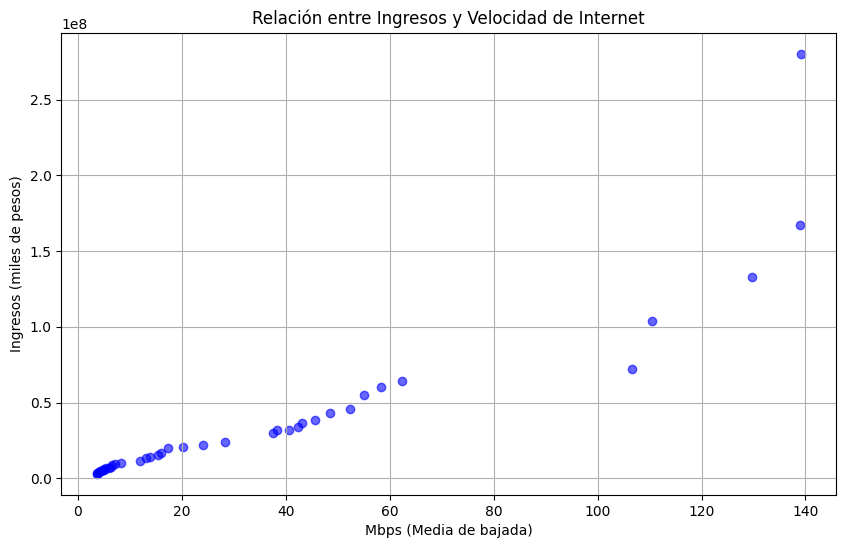

In [41]:
# Grafico de dispersión para visualizar la relación entre Ingresos y Velocidad
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Mbps (Media de bajada)'], filtered_df['Ingresos (miles de pesos)'], color='blue', alpha=0.6)
plt.title('Relación entre Ingresos y Velocidad de Internet')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)
plt.show()

## INSIGHTS:
- A partir de la matriz de correlacion se pudo observar que hay una relacion entre ingresos y velocidad. Tal como se ve en el grafico de dispersion, los ingresos tienden a ser mas altos conforme se usa una velocidad mas alta, lo que tiene sentido si pensamos en los diferentes planes de internet y su precio.

## >> Grafico de barras: Ingresos vs Tipo de tecnologia

In [42]:
# Identificacion de columnas duplicadas
print(merged_df.columns.duplicated())


[False False False False False False False False False False False False
 False False False  True  True False  True  True False False]


In [43]:
# Eliminacion de columnas duplicadas
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]


In [44]:
# Nuevo dataframe merged sin columanas duplicadas
merged_df = DF_total_cover.merge(DF_total_acc_tec, on='Periodo', how='inner', suffixes=('_cover', '_acc_tec')) \
                          .merge(DF_total_VMD, on='Periodo', how='inner', suffixes=('', '_vmd')) \
                          .merge(DF_ingresos, on='Periodo', how='inner', suffixes=('', '_ingresos'))


In [45]:
# Filtro de Dataset para tecnologias
technologies = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Conformar un dataset con la columna Ingresos
ingresos_tecnologia = merged_df[technologies + ['Ingresos (miles de pesos)']]

# Multiplicar cada tecnologia por los ingresos
ingresos_por_tecnologia = ingresos_tecnologia[technologies].multiply(ingresos_tecnologia['Ingresos (miles de pesos)'], axis="index")

# Suma de los ingresos por cada tecnologia
ingresos_por_tecnologia = ingresos_por_tecnologia.sum()

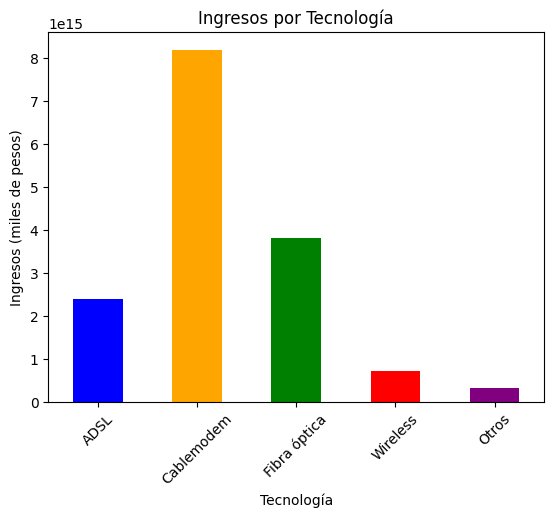

In [46]:
# Grafica de barras usando matplotlib
ingresos_por_tecnologia.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])

plt.title('Ingresos por Tecnología')
plt.xlabel('Tecnología')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()


## INSIGHTS:
- Podemos ver que las tecnologias que mas adquieren los usuarions son la fibra optica y cablemoden puesto que ofrecen mas velocidad

## >> Grafico de lineas: Ingresos vs Acceso por 100 hogares

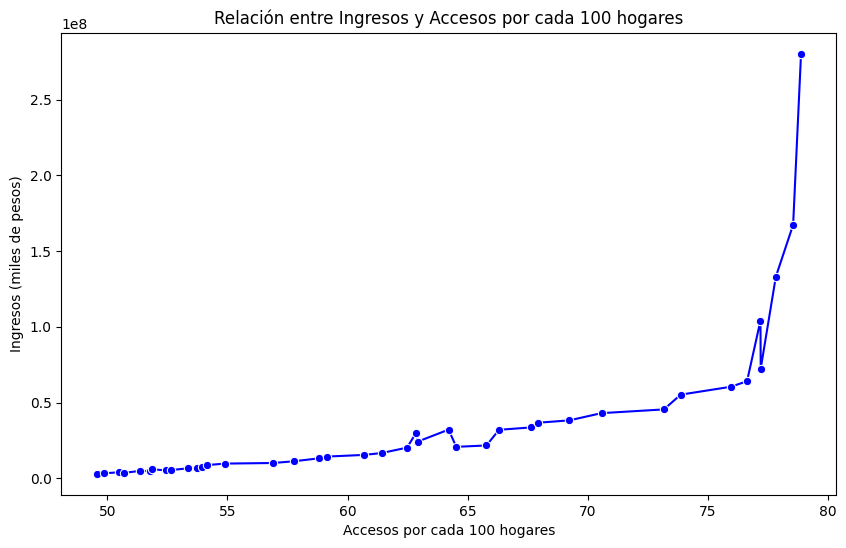

In [47]:
plt.figure(figsize=(10, 6))

# Crear un gráfico de líneas con puntos (line plot)
# Utilizamos los datos de las columnas 'Accesos por cada 100 hogares' y 'Ingresos (miles de pesos)'
sns.lineplot(data=merged_df, x='Accesos por cada 100 hogares', y='Ingresos (miles de pesos)', marker='o', color='blue')

# Añadir un título al gráfico
plt.title('Relación entre Ingresos y Accesos por cada 100 hogares')

# Añadir una etiqueta al eje X
plt.xlabel('Accesos por cada 100 hogares')

# Añadir una etiqueta al eje Y
plt.ylabel('Ingresos (miles de pesos)')

# Mostrar el gráfico en pantalla
plt.show()


## INSIGHTS:
- Como es de esperar los ingresos incrementan con respecto al acceso y en el tiempo

______________________________________________________________________________________________________________________________________________________________________________________________

# ACCESO POR PROVINCIA CON RESPECTO A LOS AÑOS

## >> Grafico de mapa de calor para estimar el numero de accesos en todas las provincias entre 2010 al 2024

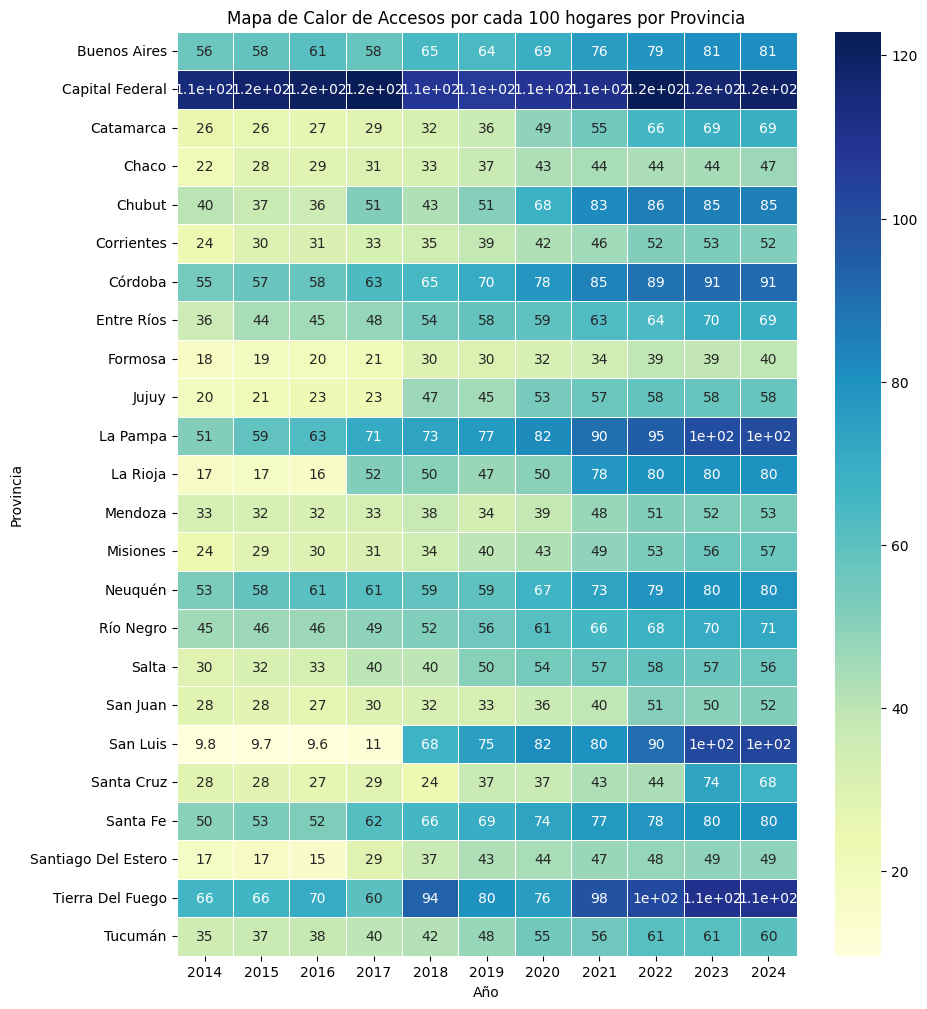

In [48]:


# Eliminar o consolidar duplicados antes de pivotar
DF_cover_homes_clean = DF_cover_homes.drop_duplicates(subset=["Provincia", "Año"])

# Pivotear el DataFrame para que las provincias sean las filas y los accesos sean las columnas
pivot_table = DF_cover_homes_clean.pivot("Provincia", "Año", "Accesos por cada 100 hogares")

# Crear el mapa de calor
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=.5)

# Añadir título y etiquetas
plt.title('Mapa de Calor de Accesos por cada 100 hogares por Provincia')
plt.xlabel('Año')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.show()


## INSIGHTS:
- El mapa de calor confirma, como incrementa el numero de nuevos accesos o clientes con el paso del tiempo en la mayor parte de las Provincias

______________________________________________________________________________________________________________________________________________________

# 2C. DATOS ANALIZAFOS PARA SER USADOS EN DASHBOARD

In [49]:
DF_Acc_tec_loc.to_excel('../Datasets/Clean_data/Work_data/DF_Acc_tec_loc.xlsx', index=False)
DF_cover_popu.to_excel('../Datasets/Clean_data/Work_data/DF_cover_popu.xlsx', index=False)
DF_cover_homes.to_excel('../Datasets/Clean_data/Work_data/DF_cover_homes.xlsx', index=False)
DF_total_cover.to_excel('../Datasets/Clean_data/Work_data/DF_total_cover.xlsx', index=False)
DF_total_acc_tec.to_excel('../Datasets/Clean_data/Work_data/DF_total_acc_tec.xlsx', index=False)
DF_acc_tec.to_excel('../Datasets/Clean_data/Work_data/DF_acc_tec.xlsx', index=False)
DF_total_acc_vec.to_excel('../Datasets/Clean_data/Work_data/DF_total_acc_vec.xlsx', index=False)
DF_ingresos.to_excel('../Datasets/Clean_data/Work_data/DF_ingresos.xlsx', index=False)
DF_mapa_connect.to_excel('../Datasets/Clean_data/Work_data/DF_mapa_connect.xlsx', index=False)
DF_ingresos_TV.to_excel('../Datasets/Clean_data/Work_data/DF_ingresos_TV.xlsx', index=False)
DF_cover_TV.to_excel('../Datasets/Clean_data/Work_data/DF_cover_TV.xlsx', index=False)
DF_ingresos_tel_fija.to_excel('../Datasets/Clean_data/Work_data/DF_ingresos_tel_fija.xlsx', index=False)
DF_cover_tel_fija.to_excel('../Datasets/Clean_data/Work_data/DF_cover_tel_fija.xlsx', index=False)
DF_ingresos_movil.to_excel('../Datasets/Clean_data/Work_data/DF_ingresos_movil.xlsx', index=False)
DF_cover_movil.to_excel('../Datasets/Clean_data/Work_data/DF_cover_movil.xlsx', index=False)
DF_total_VMD.to_excel('../Datasets/Clean_data/Work_data/DF_total_VMD.xlsx', index=False)